In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import pickle
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report, roc_curve, auc)

In [2]:
df=pd.read_csv("C:/Users/Elif/Downloads/dataset.csv")

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,itching,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,skin rash,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
3,Fungal infection,itching,skin rash,dischromic patches,nodal skin eruptions,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0
4,Fungal infection,skin rash,itching,dischromic patches,nodal skin eruptions,Irritation,Ring-shaped redness,Lesions different from skin,0.0,0.0,0.0,0.0


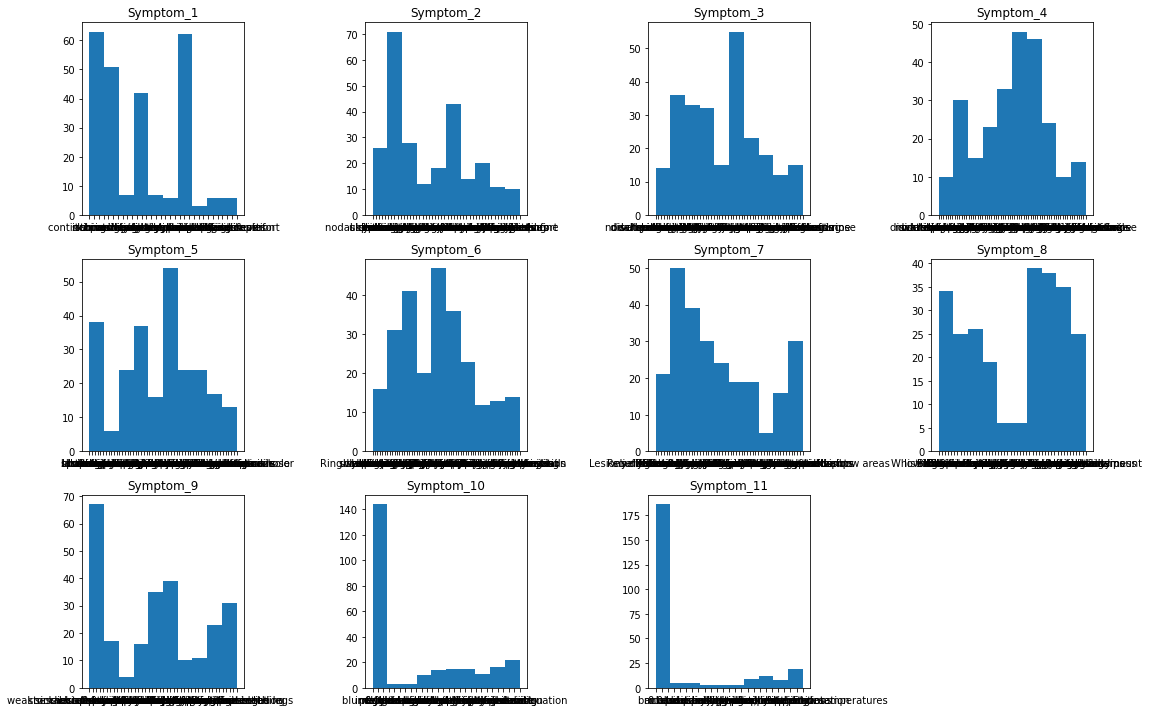

In [4]:
to_hist = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']

plt.figure(figsize=(16,10))
for idx, col in enumerate(to_hist):
    plt.subplot(3, 4, idx+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout();

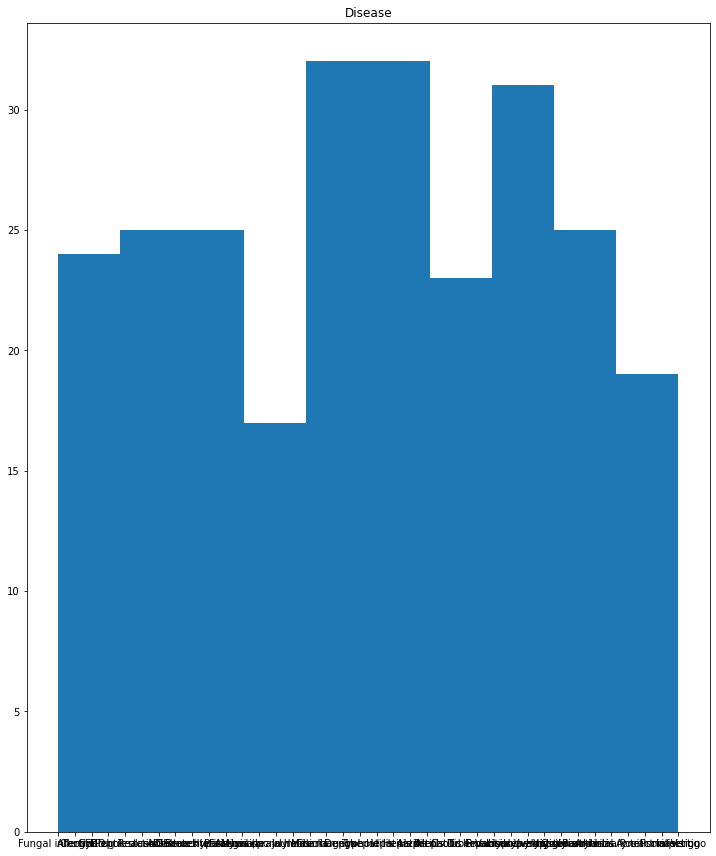

In [5]:
to_hist = ['Disease']

plt.figure(figsize=(40,35))
for idx, col in enumerate(to_hist):
    plt.subplot(3, 4, idx+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout();

In [6]:
dfcorr=df.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]

In [7]:
from sklearn.preprocessing import LabelEncoder
labencoder=LabelEncoder()
dfcorr.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]=\
dfcorr.loc[:,['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']].apply(labencoder.fit_transform)

In [8]:
dfcorr.corr()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
Disease,1.000000,-0.294459,-0.026342,-0.097008,-0.027637,0.131615,-0.056319,-0.115573,0.013243,0.282596,0.103286,0.231582
Symptom_1,-0.294459,1.000000,-0.162239,-0.006295,0.192097,-0.093986,-0.037136,-0.014698,-0.202131,0.006203,-0.068373,0.016418
Symptom_2,-0.026342,-0.162239,1.000000,-0.079639,0.088226,-0.155519,-0.038933,-0.190371,-0.005417,0.083952,0.040981,-0.041952
Symptom_3,-0.097008,-0.006295,-0.079639,1.000000,-0.269292,-0.018217,-0.010963,0.158901,0.146094,0.082387,-0.036071,0.074048
Symptom_4,-0.027637,0.192097,0.088226,-0.269292,1.000000,-0.136851,0.063846,0.002090,0.009599,0.047011,-0.152220,0.036217
Symptom_5,0.131615,-0.093986,-0.155519,-0.018217,-0.136851,1.000000,0.022903,0.037196,0.241134,0.061665,-0.116859,-0.080972
Symptom_6,-0.056319,-0.037136,-0.038933,-0.010963,0.063846,0.022903,1.000000,0.169889,-0.041980,0.011291,-0.156586,-0.298158
Symptom_7,-0.115573,-0.014698,-0.190371,0.158901,0.002090,0.037196,0.169889,1.000000,0.175091,0.036679,0.223634,0.040010
Symptom_8,0.013243,-0.202131,-0.005417,0.146094,0.009599,0.241134,-0.041980,0.175091,1.000000,0.196458,0.201868,0.137086
Symptom_9,0.282596,0.006203,0.083952,0.082387,0.047011,0.061665,0.011291,0.036679,0.196458,1.000000,0.117710,0.322392


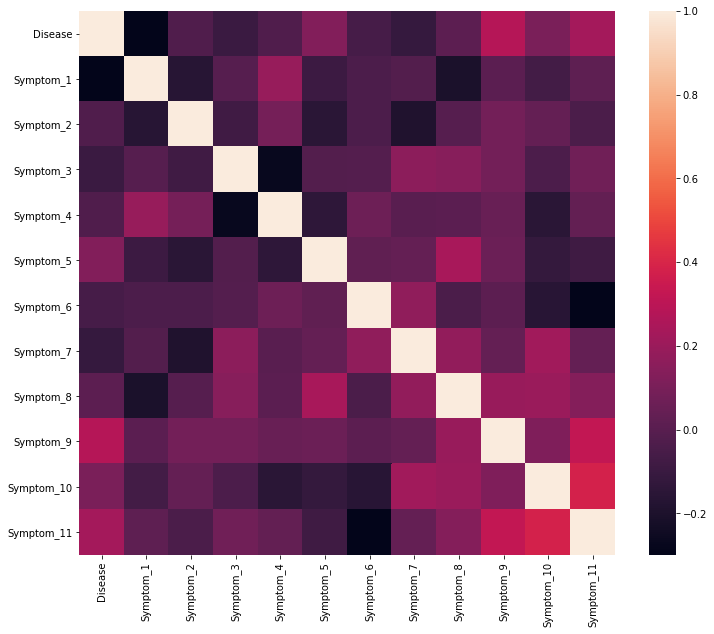

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcorr.corr());

In [10]:
quick_sample = dfcorr.sample(253, random_state=1)
quick_sample_y = quick_sample['Disease']
quick_sample_x = quick_sample.drop('Disease', axis=1)

trial_forest = RandomForestClassifier()
trial_forest.fit(quick_sample_x, quick_sample_y)

RandomForestClassifier()

1.0


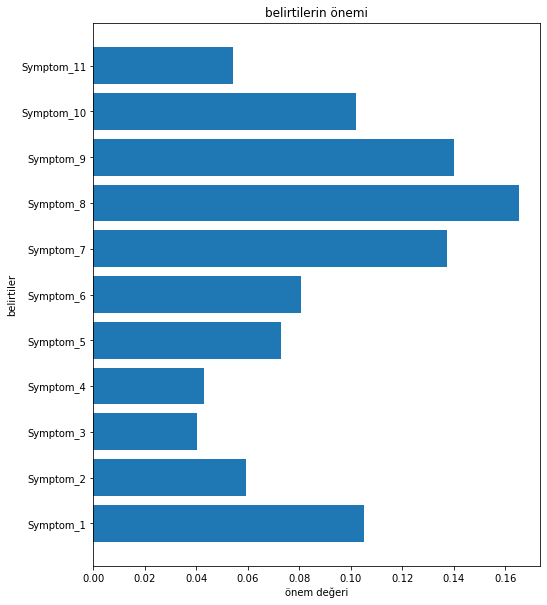

In [11]:
print(trial_forest.score(quick_sample_x, quick_sample_y))
n_features = quick_sample_x.shape[1]
plt.figure(figsize=(8,10))
plt.barh(range(n_features), trial_forest.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), quick_sample_x.columns) 
plt.xlabel("önem değeri")
plt.ylabel("belirtiler")
plt.title('belirtilerin önemi');

In [12]:
y = df['Disease']

In [13]:
#print ("Disease before apply encoding: ",np.unique(y))
#Y=labencoder.fit_transform(y)
#print("Disease after apply encoding:",np.unique(Y))

In [14]:
X=df.loc[:,['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]

In [15]:

X.loc[:,['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']]=\
X.loc[:,['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']].apply(labencoder.fit_transform)

In [16]:
X.head(150)

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,13,35,34,15,0,1,2,0,0,0,0
1,23,27,17,27,0,1,2,0,0,0,0
2,13,27,16,49,0,1,2,0,0,0,0
3,13,35,16,36,0,1,2,0,0,0,0
4,23,19,16,36,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,9,47,32,30,15,59,6,21,7,0,0
146,14,42,20,64,10,34,28,8,40,0,0
147,27,14,53,11,33,30,5,46,19,0,0
148,14,14,53,11,33,30,5,46,38,0,0


In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30,random_state=42)

In [18]:
print("train shape:",X_train.shape)
print("test shape:",X_test.shape)


train shape: (177, 11)
test shape: (76, 11)


In [19]:
X_trainfirst = X_train.copy()
y_trainfirst= y_train.copy()
X_testfirst = X_test.copy()
y_testfirst = y_test.copy()

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
import sklearn.metrics as metrics
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
confusion= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
classification = classification_report(y_test, y_pred)
print("Classification Report:",)
print (classification)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         2
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.67      1.00      0.80         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            

In [22]:
#from sklearn.metrics import mean_absolute_error , r2_score
#print("mean:", mean_absolute_error(y_test,y_pred))
#r2_score(y_test,y_pred)

In [23]:
y_test.shape


(76,)

In [24]:
y_pred.shape

(76,)

In [25]:
from sklearn.model_selection import  GridSearchCV
params = {'n_estimators': [50],'max_features': [5], 'max_depth': np.arange(1,20)}

grid_clf= GridSearchCV(clf, params, cv=5, n_jobs=-1)

grid_clf.fit(X_train, y_train)

C:\Users\Elif\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': [5], 'n_estimators': [50]})

In [26]:
print('Best score:', grid_clf.best_score_)
print('Best params:', grid_clf.best_params_)

Best score: 0.9606349206349206
Best params: {'max_depth': 18, 'max_features': 5, 'n_estimators': 50}


In [27]:
y_prediction = grid_clf.predict(X_test)

In [28]:
classification = classification_report(y_test, y_prediction)
print("Classification Report:",)
print (classification)
accuracy = accuracy_score(y_test,y_prediction)
print("Accuracy:",accuracy)

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.50      1.00      0.67         1
                                Allergy       1.00      1.00      1.00         2
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.67      1.00      0.80         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      0.67      0.80         3
                               Diabetes       1.00      1.00      1.00         1
    

C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#from sklearn.metrics import mean_absolute_error , r2_score
#print("mean:", mean_absolute_error(y_test,y_prediction))
#r2_score(y_test,y_prediction)

In [30]:
y_test.shape

(76,)

In [31]:
y_prediction.shape

(76,)

In [32]:
pipe = Pipeline([('forest1', RandomForestClassifier(max_depth=20, max_features=5, n_estimators=100))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('forest1',
                 RandomForestClassifier(max_depth=20, max_features=5))])

In [33]:
y_predicted = pipe.predict(X_test)


In [34]:
classification = classification_report(y_test, y_predicted )
print("Classification Report:",)
print (classification)
accuracy = accuracy_score(y_test,y_predicted)
print("Accuracy:",accuracy)

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         2
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.67      1.00      0.80         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      0.67      0.80         3
                               Diabetes       1.00      1.00      1.00         1
    

In [35]:
pipe.predict([[13,35,34,15,0,1,2,0,0,0,0]])

array(['Fungal infection'], dtype=object)

In [36]:
import pickle

filename = 'diagnosis.pkl'
pickle.dump(pipe, open(filename, 'wb'))

In [37]:
model = pickle.load(open('diagnosis.pkl','rb'))
print(model.predict([[13,35,34,15,0,1,2,0,0,0,0]]))

['Fungal infection']


In [38]:
pkl_filename = "diagnosis.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    

In [39]:
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 98.68 %


In [40]:
tuple_objects = (pipe, X_train, y_train, score)

In [41]:
pickle.dump(tuple_objects, open("tuple_model.pkl", 'wb'))


In [42]:
pickled_model, pickled_Xtrain, pickled_Ytrain, pickled_score = pickle.load(open("tuple_model.pkl", 'rb'))

In [43]:
import joblib
joblib_file = "joblib_model.pkl"
joblib.dump(pipe, joblib_file)

['joblib_model.pkl']

In [44]:
joblib_model = joblib.load(joblib_file)

In [45]:
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 98.68 %


In [46]:
pickle_model.predict([[22,8,50,9,20,47,50,38,0,0,0]])

array(['Allergy'], dtype=object)

In [47]:
pipe.predict([[13,35,34,15,0,1,2,0,0,0,0]])


array(['Fungal infection'], dtype=object)

In [48]:
p_disease=pipe.predict([[13,35,34,15,0,1,2,0,0,0,0]])

In [49]:
P_disease=labencoder.fit_transform(p_disease)
print("Disease after apply encoding:",np.unique(P_disease))

Disease after apply encoding: [0]


In [52]:
#y1=df.loc[:,['Precaution1','Precaution2','Precaution3','Precaution4']]

In [53]:
#from sklearn.multioutput import MultiOutputClassifier
#X1=df['Disease']=\
#X1=df.loc[:,['Disease']].apply(labencoder.fit_transform)

In [54]:
#X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.2, random_state=1)

In [55]:
#dsg=MultiOutputClassifier(RandomForestClassifier(random_state=1),n_jobs=-1)
#dsg=dsg.fit(X1_train,y1_train)
#y1_pred=dsg.predict(X1_test)

In [56]:
#dsg.predict([P_disease])